In [337]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import array
import cv2
import os

## EigenFaces - Linear Algebra

The main idea here is to use linear algebra to find the best linear combination of the training images to represent a test image. The training images are the basis vectors for the linear combination. The test image is the vector that we want to represent as a linear combination of the training images. The linear combination is the best in the sense that it minimizes the squared error between the test image and the linear combination of the training images.

First of all, we need to import the necessary libraries, open the images and convert them to grayscale.

In [338]:
#Paths to the images
train_cat = "cat2dog_resized/train_cats"
train_dog = "cat2dog_resized/train_dogs"
test_cat = "cat2dog_resized/test_cats"
test_dog = "cat2dog_resized/test_dogs"

In [339]:
#create a list of all the images
train_cat_list, train_dog_list, test_cat_list, test_dog_list = [], [], [], []

In [340]:
#Read images
for image in (os.listdir(train_cat)): 
    path = os.path.join(train_cat, image)
    img = cv2.imread(path) 
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    train_cat_list.append(img)

for image in (os.listdir(train_dog)): 
    path = os.path.join(train_dog, image)
    img = cv2.imread(path) 
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    train_dog_list.append(img)

for image in (os.listdir(test_cat)):
    path = os.path.join(test_cat, image)
    img = cv2.imread(path) 
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    test_cat_list.append(img)

for image in (os.listdir(test_dog)):
    path = os.path.join(test_dog, image)
    img = cv2.imread(path) 
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    test_dog_list.append(img)

#Convertin the list to numpy array
test_cat_np, test_dog_np, train_cat_np, train_dog_np = np.array(test_cat_list), np.array(test_dog_list), np.array(train_cat_list), np.array(train_dog_list)

Text(0.5, 1.0, 'Dog Test')

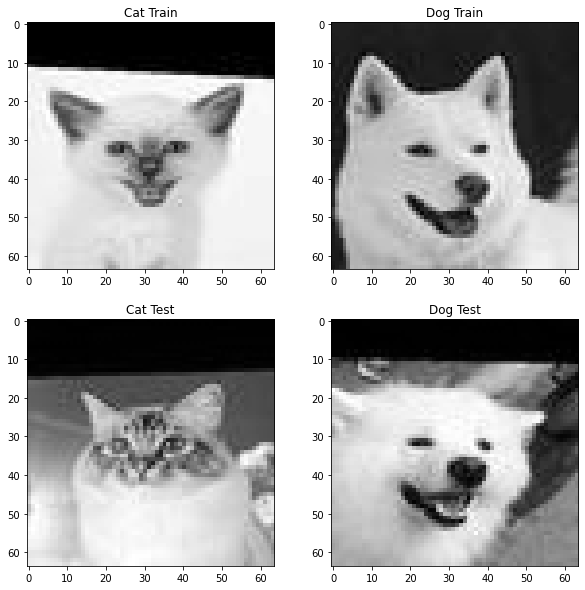

In [341]:
#Plot the images
fig, ax = plt.subplots(2, 2, figsize=(10, 10))
ax[0, 0].imshow(train_cat_list[0], cmap='gray')
ax[0, 0].set_title("Cat Train")
ax[0, 1].imshow(train_dog_list[0], cmap='gray')
ax[0, 1].set_title("Dog Train")
ax[1, 0].imshow(test_cat_list[0], cmap='gray')
ax[1, 0].set_title("Cat Test")
ax[1, 1].imshow(test_dog_list[0], cmap='gray')
ax[1, 1].set_title("Dog Test")

Now let's reshape the matrix and centralize it, so we have the mean image.

In [342]:
#Reshape the images
test_cat_np_matrix = test_cat_np.reshape(test_cat_np.shape[0], test_cat_np.shape[1]*test_cat_np.shape[2])
test_dog_np_matrix = test_dog_np.reshape(test_dog_np.shape[0], test_dog_np.shape[1]*test_dog_np.shape[2])
train_cat_np_matrix = train_cat_np.reshape(train_cat_np.shape[0], train_cat_np.shape[1]*train_cat_np.shape[2])
train_dog_np_matrix = train_dog_np.reshape(train_dog_np.shape[0], train_dog_np.shape[1]*train_dog_np.shape[2])

In [355]:
mean_test_cat = np.mean(test_cat_np_matrix, axis=0)
centered_test_cat = test_cat_np_matrix - mean_test_cat

mean_test_dog = np.mean(test_dog_np_matrix, axis=0)
centered_test_dog = test_dog_np_matrix - mean_test_dog

mean_train_cat = np.mean(train_cat_np_matrix, axis=0)
centered_train_cat = train_cat_np_matrix - mean_train_cat

mean_train_dog = np.mean(train_dog_np_matrix, axis=0)
centered_train_dog = train_dog_np_matrix - mean_train_dog

In [356]:
U_CAT_TEST, S_CAT_TEST, V_CAT_TEST = np.linalg.svd(centered_test_cat, full_matrices=False)
U_DOG_TEST, S_DOG_TEST, V_DOG_TEST = np.linalg.svd(centered_test_dog, full_matrices=False)
U_CAT_TRAIN, S_CAT_TRAIN, V_CAT_TRAIN = np.linalg.svd(centered_train_cat, full_matrices=False)
U_DOG_TRAIN, S_DOG_TRAIN, V_DOG_TRAIN = np.linalg.svd(centered_train_dog, full_matrices=False)


In [498]:
n_comp = 771
C_CAT_TRAIN = V_CAT_TRAIN[:n_comp]
eigen_cats_train = C_CAT_TRAIN.reshape((n_comp, 64, 64))
C_DOG_TRAIN = V_DOG_TRAIN[:n_comp]
eigen_dogs_train = C_DOG_TRAIN.reshape((n_comp, 64, 64))

In [499]:
percent_eigenvalues = [eigenvalue/np.sum(S_CAT_TRAIN**2) for eigenvalue in S_CAT_TRAIN**2]
count = 0
total_var = 0
var_values = []
for eigenvalue in percent_eigenvalues:
    total_var += eigenvalue
    count += 1
    var_values.append(total_var)
    if total_var > 0.95:
        break

print("Count:", count, "\nTotal Variance:", total_var)

Count: 109 
Total Variance: 0.950230773369367


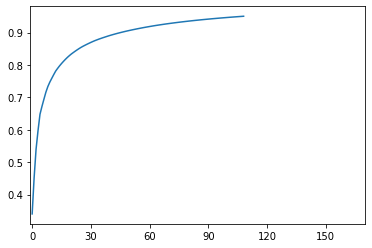

In [500]:
plt.plot(var_values)
plt.xticks(range(0,170,30))
plt.xlim(-1, 170)
# plt.savefig(os.path.join('images', 'accumulated variance.png'))
plt.show()

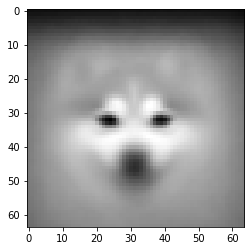

In [501]:
plt.figure()
plt.imshow(mean_train_cat.reshape(64, 64), cmap='gray')
plt.imshow(mean_train_dog.reshape(64, 64), cmap='gray')

In [510]:
# Transformando S em uma matriz diagonal com o mesmo tamanho que imgs_cent (já que estamos calculando a decomposição dela)
S0_TEST_CAT = np.zeros(centered_test_cat.shape)
S0_TEST_CAT[:S_CAT_TEST.shape[0], :S_CAT_TEST.shape[0]] = np.diag(S_CAT_TEST)

S0_DOG_TEST = np.zeros(centered_test_dog.shape)
S0_DOG_TEST[:S_DOG_TEST.shape[0], :S_DOG_TEST.shape[0]] = np.diag(S_DOG_TEST)

S0_CAT_TRAIN = np.zeros(centered_train_cat.shape)
S0_CAT_TRAIN[:S_CAT_TRAIN.shape[0], :S_CAT_TRAIN.shape[0]] = np.diag(S_CAT_TRAIN)

S0_DOG_TRAIN = np.zeros(centered_train_dog.shape)
S0_DOG_TRAIN[:S_DOG_TRAIN.shape[0], :S_DOG_TRAIN.shape[0]] = np.diag(S_DOG_TRAIN)

centered_train_cat.shape


(771, 4096)

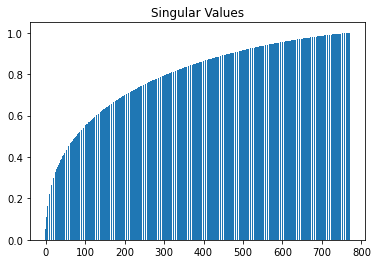

In [385]:
#Verificando a quantidade de componentes para selecionar
plt.figure()
plt.title('Singular Values')
plt.bar(range(len(S_CAT_TRAIN)), np.cumsum(S_CAT_TRAIN)/np.sum(S_CAT_TRAIN))
plt.show()

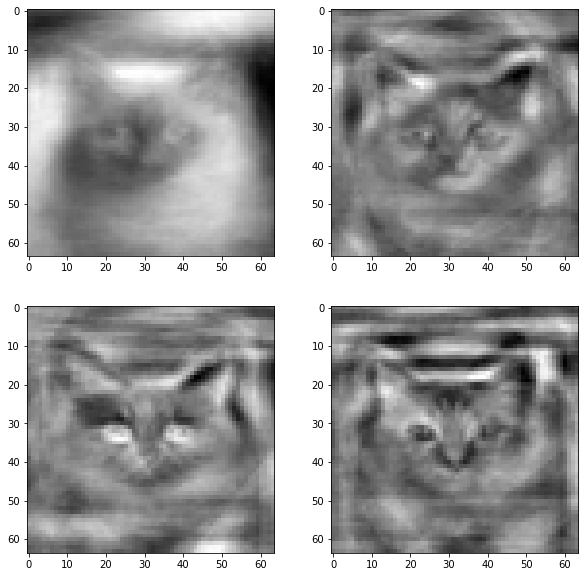

In [503]:
#Plot the images
fig, ax = plt.subplots(2, 2, figsize=(10, 10))
ax[0, 0].imshow(eigen_cats_train[10], cmap='gray')
ax[0, 1].imshow(eigen_cats_train[50], cmap='gray')
ax[1, 0].imshow(eigen_cats_train[59], cmap='gray')
ax[1, 1].imshow(eigen_cats_train[56], cmap='gray')

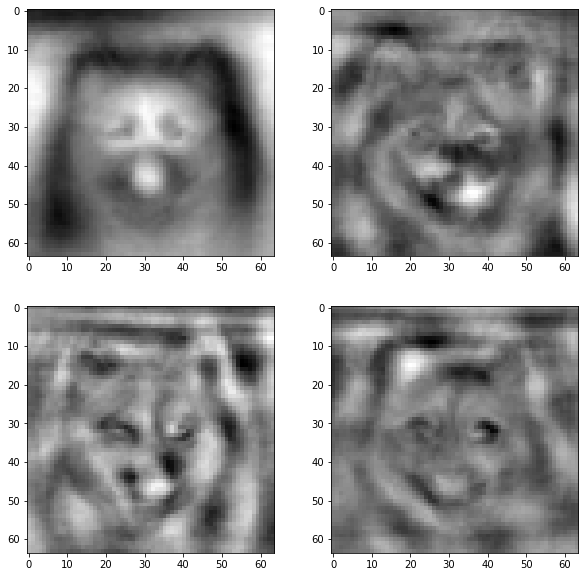

In [504]:
#Plot the images
fig, ax = plt.subplots(2, 2, figsize=(10, 10))
ax[0, 0].imshow(eigen_dogs_train[10], cmap='gray')
ax[0, 1].imshow(eigen_dogs_train[50], cmap='gray')
ax[1, 0].imshow(eigen_dogs_train[59], cmap='gray')
ax[1, 1].imshow(eigen_dogs_train[56], cmap='gray')

In [478]:
def is_a_cat(image):
    img_to_recognize = image.reshape(4096)
    subtracted_matrix_rec = img_to_recognize - mean_train_cat # Centralizes the inputted image
    subtracted_matrix_rec = subtracted_matrix_rec.flatten()

    eigenfaces_matrix = V_CAT_TRAIN[:771,:] # Gets the requested amount of eigenfaces

    weight = subtracted_matrix_rec @ eigenfaces_matrix.T # Gets the eigenface weights

    projection = eigenfaces_matrix.T @ weight # Gets the projection of the image on the facespace

    proj_error = np.linalg.norm(subtracted_matrix_rec - projection) # Gets the projection error
    if proj_error < 800:
        return True
    else:
        return False

def is_a_dog(image):
    img_to_recognize = image.reshape(4096)
    subtracted_matrix_rec = img_to_recognize - mean_train_dog # Centralizes the inputted image
    subtracted_matrix_rec = subtracted_matrix_rec.flatten()

    eigenfaces_matrix = V_DOG_TRAIN[:771,:] # Gets the requested amount of eigenfaces

    weight = subtracted_matrix_rec @ eigenfaces_matrix.T # Gets the eigenface weights

    projection = eigenfaces_matrix.T @ weight # Gets the projection of the image on the facespace

    proj_error = np.linalg.norm(subtracted_matrix_rec - projection) # Gets the projection error
    if proj_error < 800:
        return True
    else:
        return False

def dog_or_cat(image):
    if is_a_cat(image):
        return "cat"
    elif is_a_dog(image):
        return "dog"
    else:
        return "unknown"

In [ ]:
dogiscat = []
for image in test_dog_np_matrix:
    if is_a_cat(image) == True and :
        dogiscat.append(1)
        print("Dog classified as cat")
    else:
        dogiscat.append(0)
        print("Dog classified as dog")
catiscat = []
for image in test_cat_np_matrix:
    if is_a_cat(image):
        catiscat.append(1)
        print("Cat classified as cat")
    else:
        catiscat.append(0)
        print("Cat classified as dog")

In [475]:
print("DogAccuracy:", 1 - np.sum(dogiscat)/len(dogiscat))
print("CatAccuracy:", 1 - np.sum(catiscat)/len(catiscat))

DogAccuracy: 0.77
CatAccuracy: 0.22999999999999998


In [495]:
right = []
for image in test_dog_np_matrix:
    if dog_or_cat(image) == "dog":
        right.append(1)
    else:
        right.append(0)

In [496]:
print(right)

[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0]


In [497]:
print("DogAccuracy:", 1 - np.sum(right)/len(right))

DogAccuracy: 0.76


In [483]:
right_cat = []
for image in test_cat_np_matrix:
    if dog_or_cat == "cat":
        right_cat.append(1)
    else:
        right_cat.append(0)

In [484]:
print("CatAccuracy:", 1 - np.sum(right_cat)/len(right_cat))

CatAccuracy: 1.0


In [ ]:
def identificador_de_gatos(imagem, n_componentes):
    '''Retorna True ou False dependendo da proximidade da imagem com a de um gato'''
    img = plt.imread(imagem)
    img1 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img2 = cv2.resize(img1, dsize=(64,64), interpolation=cv2.INTER_CUBIC)
    img3 = img2.reshape((4096,))
    U_ = U_CAT_TRAIN[:n_componentes]
    print(np.dot(U_,U_.T).shape)
    p = np.dot(np.identity(n_componentes) - np.dot(U_,U_.T), img3 - mean_train_cat)
    print(p.shape)
    d = np.linalg.norm(p)
    lim = 6.5e-12
    return d < lim, d

In [512]:
imagem = 'images/0010.png'
img = plt.imread(imagem)
img1 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img2 = cv2.resize(img1, dsize=(64,64), interpolation=cv2.INTER_CUBIC)
img3 = img2.reshape((4096,))
print(is_a_cat(img3, n_comp))
plt.imshow(plt.imread(imagem),cmap=plt.cm.gray) 
plt.xticks(())
plt.yticks(())

TypeError: is_a_cat() takes 1 positional argument but 2 were given